In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from geopy.distance import geodesic
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_data = pd.read_csv('train_oil.csv')
test_data = pd.read_csv('oil_test.csv')

In [ ]:
#Размеры датасетов
print(f"Train dataset shape: {train_data.shape}")
print(f"Test dataset shape: {test_data.shape}")

Train dataset shape: (309, 20)
Test dataset shape: (133, 19)


In [ ]:
train_data

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,HIDES,IMBURU-TORO,PAPUA NEW GUINEA,FAR EAST,PAPUAN FTB,COMPRESSION,-6.0136,142.8409,OIL SEARCH LTD,ONSHORE,GAS-CONDENSATE,CONTINUING DEVELOPMENT,THRUST,9905,JURASSIC-CRETACEOUS,SANDSTONE,490.0,240.0,10.0,100.0
305,DRAKE POINT,DRAKE POINT-INTREPID INLET,CANADA,NORTH AMERICA,SVERDRUP,COMPRESSION/EVAPORITE/EXTENSION/LINKED,76.4462,-108.9172,PANARCTIC OILS,ONSHORE,GAS,UNDEVELOPED,FORELAND,3390,JURASSIC,SANDSTONE,100.0,71.0,20.0,566.0
306,ALTAMONT-BLUEBELL,GREEN RIVER AND COLTON/WASATCH,USA,NORTH AMERICA,UINTA,COMPRESSION,40.3000,-110.2100,NUMEROUS,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250,PALEOGENE,SANDSTONE,8000.0,575.0,5.0,0.1
307,BELL CREEK,MUDDY,USA,NORTH AMERICA,POWDER RIVER,COMPRESSION,45.1039,-105.0967,SAMUEL GARY,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,4300,CRETACEOUS,SANDSTONE,45.0,23.0,28.5,2250.0


In [ ]:
print("\nПропуски в тренировочных данных:")
print(train_data.isnull().sum())
print("\nПропуски в тестовых данных:")
print(test_data.isnull().sum())


Пропуски в тренировочных данных:
Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64

Пропуски в тестовых данных:
Field name                         0
Reservoir unit                     0
Country                           13
Region                            16
Basin name                         8

In [ ]:
train_data.isna().sum().sum()

np.int64(160)

In [ ]:
test_data.isna().sum().sum()

np.int64(66)

<ipython-input-50-2ab7b5a6deac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Onshore/Offshore', data=train_data, palette=['#48252F', '#857861', '#744B33'])


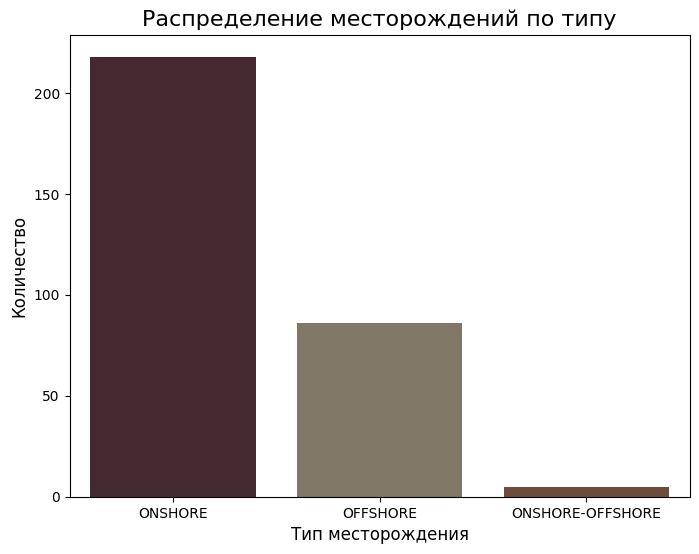

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Onshore/Offshore', data=train_data, palette=['#48252F', '#857861', '#744B33'])
plt.title('Распределение месторождений по типу', fontsize=16)
plt.xlabel('Тип месторождения', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show()

In [ ]:
print(train_data.columns)

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Tectonic regime', 'Latitude', 'Longitude', 'Operator company',
       'Onshore/Offshore', 'Hydrocarbon type', 'Reservoir status',
       'Structural setting', 'Depth', 'Reservoir period', 'Lithology',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability'],
      dtype='object')


In [ ]:
train_data = train_data.drop(columns=['Tectonic regime', 'Structural setting', 'Field name', 'Reservoir unit', 'Country',
                            'Region', 'Basin name', 'Operator company'])
test_data = test_data.drop(columns=['Tectonic regime', 'Structural setting', 'Field name', 'Reservoir unit', 'Country',
                            'Region', 'Basin name', 'Operator company'])

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        282 non-null    float64
 1   Longitude                       279 non-null    float64
 2   Onshore/Offshore                309 non-null    object 
 3   Hydrocarbon type                309 non-null    object 
 4   Reservoir status                309 non-null    object 
 5   Depth                           309 non-null    int64  
 6   Reservoir period                309 non-null    object 
 7   Lithology                       309 non-null    object 
 8   Thickness (gross average ft)    309 non-null    float64
 9   Thickness (net pay average ft)  309 non-null    float64
 10  Porosity                        309 non-null    float64
 11  Permeability                    309 non-null    float64
dtypes: float64(6), int64(1), object(5)
m

In [ ]:
# Выбираем числовые признаки
numeric_features = ['Depth', 'Thickness (gross average ft)', 'Thickness (net pay average ft)',
                   'Porosity', 'Permeability']

#Обрабатываем обучающий набор
# Создаем целевой признак (0 - onshore, 1 - offshore) для обучающего набора
if 'Onshore/Offshore' in train_data.columns:
    train_data['Target'] = train_data['Onshore/Offshore'].apply(lambda x: 0 if x == 'ONSHORE' else 1)
else:
    # Для тестовых данных без целевой переменной
    train_data['Target'] = -1

# Заполняем пропуски средними значениями
train_data[numeric_features] = train_data[numeric_features].fillna(train_data[numeric_features].mean())

# Получаем выборку для числовых признаков и целевого признака для обучающего набора
X_train = train_data[numeric_features]
y_train = train_data['Target']


#Обрабатываем тестовый набор данных
# Создаем целевой признак (0 - onshore, 1 - offshore)
if 'Onshore/Offshore' in test_data.columns:
    test_data['Target'] = test_data['Onshore/Offshore'].apply(lambda x: 0 if x == 'ONSHORE' else 1)
else:
    # Для тестовых данных без целевой переменной
    test_data['Target'] = -1

# Заполняем пропуски средними значениями для тестового набора данных
test_data[numeric_features] = test_data[numeric_features].fillna(test_data[numeric_features].mean())

# Получаем выборку для числовых признаков и целевого признака для тестового набора
X_test = test_data[numeric_features]
y_test = test_data['Target']

In [ ]:
# масштабирование числовых признаков
scaler = StandardScaler()
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

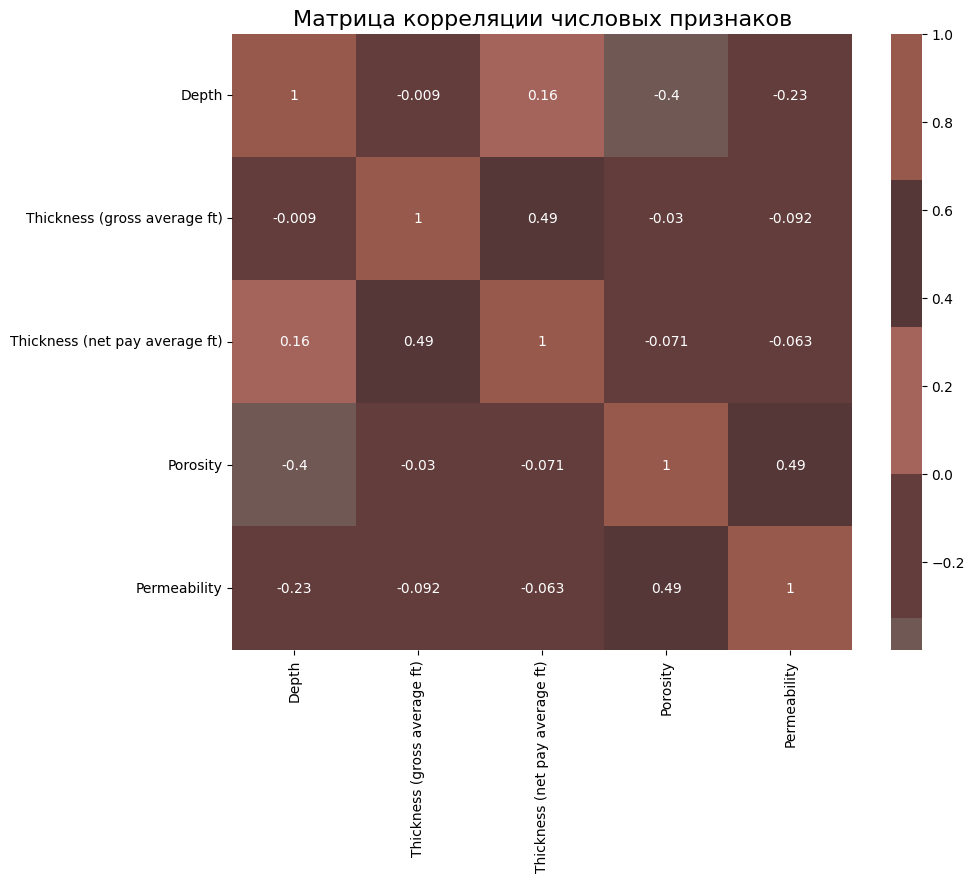

In [ ]:
numeric_features = ['Depth', 'Thickness (gross average ft)',
                   'Thickness (net pay average ft)', 'Porosity', 'Permeability']

plt.figure(figsize=(10, 8))
custom_colors = ['#3F3130', '#705854', '#633D3C', '#A4645C', '#563738', '#97594C']
corr_matrix = train_data[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette(custom_colors, as_cmap=True), center=0)
plt.title('Матрица корреляции числовых признаков', fontsize=16)
plt.show()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
#еще раз масштабируем, но уже разделенные данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
#Басансировка методом ADAXYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

<ipython-input-59-258ced9e9fea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Onshore/Offshore', y=feature, data=train_data_plot, palette=['#48252F', '#857861', '#744B33'])
<ipython-input-59-258ced9e9fea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Onshore/Offshore', y=feature, data=train_data_plot, palette=['#48252F', '#857861', '#744B33'])
<ipython-input-59-258ced9e9fea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Onshore/Offshore', y=feature, data=train_data_plot, palette=['#48252F', '#857861', '#744B33'])
<ipython-i

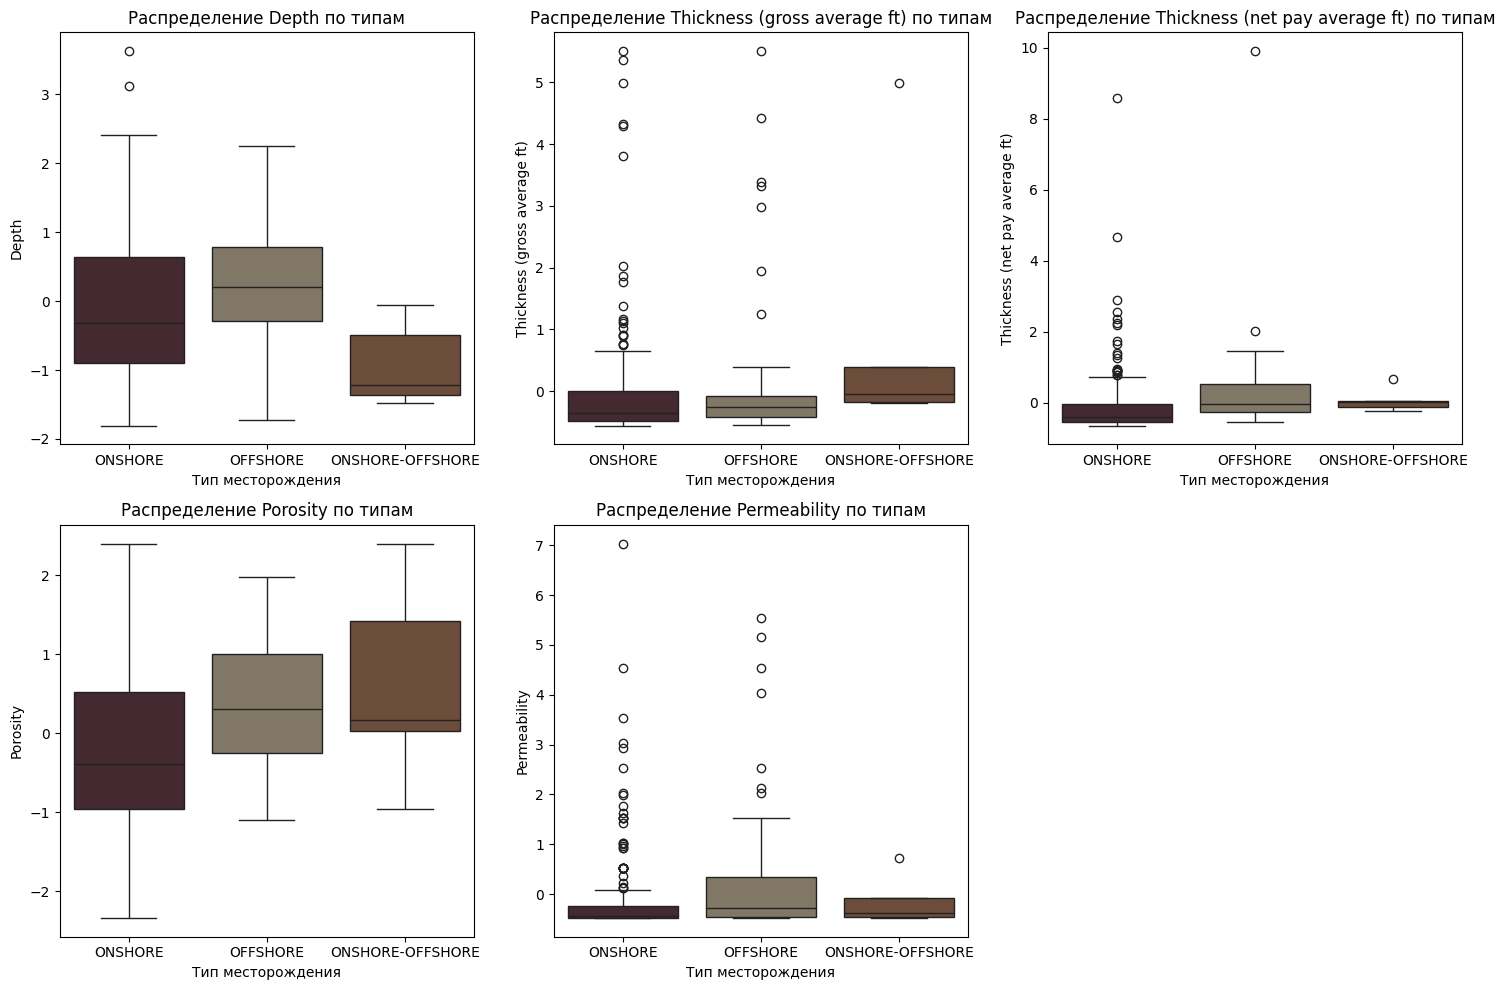

In [ ]:
train_data_plot = train_data.copy()
train_data_plot[numeric_features] = scaler.fit_transform(train_data_plot[numeric_features])

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Onshore/Offshore', y=feature, data=train_data_plot, palette=['#48252F', '#857861', '#744B33'])
    plt.title(f'Распределение {feature} по типам')
    plt.xlabel('Тип месторождения')
plt.tight_layout()
plt.show()

In [ ]:
#Logistic Regression (логистическая регрессия)
print("\n" + "="*50)
print("Logistic Regression")
print("="*50)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_adasyn, y_train_adasyn)
y_pred = lr.predict(X_val)

print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

report = classification_report(y_val, y_pred, output_dict=True)
f1_class0 = report['0']['f1-score']  # F1 для класса 0
f1_class1 = report['1']['f1-score']  # F1 для класса 1
macro_f1 = report['macro avg']['f1-score']
macro_f1


Logistic Regression

Logistic Regression Performance:
Accuracy: 0.5645161290322581

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.49      0.61        43
           1       0.39      0.74      0.51        19

    accuracy                           0.56        62
   macro avg       0.60      0.61      0.56        62
weighted avg       0.68      0.56      0.58        62



0.5588932806324111

In [ ]:
#Random Forest (Случайный лес, создание множества деревьев решений и объединение их результатов для получения более точного прогноза)
print("\n" + "="*50)
print("Random Forest")
print("="*50)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_adasyn, y_train_adasyn)
y_pred = rf.predict(X_val)

print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

report = classification_report(y_val, y_pred, output_dict=True)
f1_class0 = report['0']['f1-score']  # F1 для класса 0
f1_class1 = report['1']['f1-score']  # F1 для класса 1
macro_f1 = report['macro avg']['f1-score']
macro_f1


Random Forest

Random Forest Performance:
Accuracy: 0.7419354838709677

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.79        43
           1       0.56      0.79      0.65        19

    accuracy                           0.74        62
   macro avg       0.72      0.76      0.72        62
weighted avg       0.78      0.74      0.75        62



0.7235228539576366

In [ ]:
#Gradient Boosting (объединение в одну модель множество посредственных)
print("\n" + "="*50)
print("Gradient Boosting")
print("="*50)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_adasyn, y_train_adasyn)
y_pred = gb.predict(X_val)

print("\nGradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

report = classification_report(y_val, y_pred, output_dict=True)
f1_class0 = report['0']['f1-score']  # F1 для класса 0
f1_class1 = report['1']['f1-score']  # F1 для класса 1
macro_f1 = report['macro avg']['f1-score']
macro_f1


Gradient Boosting

Gradient Boosting Performance:
Accuracy: 0.7741935483870968

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        43
           1       0.61      0.74      0.67        19

    accuracy                           0.77        62
   macro avg       0.74      0.76      0.75        62
weighted avg       0.79      0.77      0.78        62



0.7479674796747967

In [ ]:
#SVM (Метод опорных векторов, перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с наибольшим зазором в этом пространстве)
print("\n" + "="*50)
print("SVM")
print("="*50)
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_adasyn, y_train_adasyn)
y_pred = svm.predict(X_val)

print("\nSupport Vector Machine Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

report = classification_report(y_val, y_pred, output_dict=True)
f1_class0 = report['0']['f1-score']  # F1 для класса 0
f1_class1 = report['1']['f1-score']  # F1 для класса 1
macro_f1 = report['macro avg']['f1-score']
macro_f1


SVM

Support Vector Machine Performance:
Accuracy: 0.6935483870967742

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        43
           1       0.50      0.79      0.61        19

    accuracy                           0.69        62
   macro avg       0.69      0.72      0.68        62
weighted avg       0.76      0.69      0.71        62



0.6794557823129252

In [ ]:
#Метод ближайших соседей
knn = KNeighborsClassifier(n_neighbors=5)

# Подбор оптимального k
param_grid = {'n_neighbors': range(1, 21)}  # Проверяем k от 1 до 20
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Лучший параметр
best_k = grid_search.best_params_['n_neighbors']
print(f"Оптимальное число соседей (k): {best_k}")

# Обучение модели с лучшим k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Предсказание и оценка
y_val_pred = best_knn.predict(X_val)
print("\nKNN Performance (Validation Set):")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

Оптимальное число соседей (k): 9

KNN Performance (Validation Set):
Accuracy: 0.7419354838709677

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        43
           1       0.62      0.42      0.50        19

    accuracy                           0.74        62
   macro avg       0.70      0.65      0.66        62
weighted avg       0.73      0.74      0.73        62



Анализ моделей по F1-score:

худшая модель: Логистическая регрессия (0,56)
среднее значение: Метод опорных векторов(0,69)
модели с высокими значениями: Случайный лес(0,74) и Метод ближайших соседей(0,74)
наилучшая модель: Градиентный бустинг(0,77)
Дальнейшие действия буду проводить сначала на Random Forest, Gradient Boosting и Knn.

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_adasyn, y_train_adasyn)

# Прогнозирование на тестовых данных
predictions = model.predict(X_test)

# Создание DataFrame с результатами в требуемом формате
results = pd.DataFrame({
    'index': test_data.index,
    'Onshore/Offshore': predictions
})

# Сохранение результатов в CSV-файл
results.to_csv('f_2_predictions.csv', index=False)
print(results.head())

   index  Onshore/Offshore
0      0                 0
1      1                 1
2      2                 0
3      3                 1
4      4                 0


In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train_adasyn, y_train_adasyn)

# Прогнозирование на тестовых данных
predictions = gb_model.predict(X_test)

# Создание DataFrame с результатами в требуемом формате
results = pd.DataFrame({
    'index': test_data.index,
    'Onshore/Offshore': predictions
})

# Сохранение результатов в CSV-файл
results.to_csv('gb_2_predictions.csv', index=False)
print("\nПервые 5 строк файла с предсказаниями:")
print(results.head())


Первые 5 строк файла с предсказаниями:
   index  Onshore/Offshore
0      0                 0
1      1                 1
2      2                 0
3      3                 1
4      4                 0


In [ ]:
knn_model = KNeighborsClassifier(
    n_neighbors=9,
    metric='euclidean',
    weights='uniform'
)
knn_model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
predictions = knn_model.predict(X_test)

# Создание DataFrame с результатами
results = pd.DataFrame({
    'index': test_data.index,
    'Onshore/Offshore': predictions
})

# Сохранение в CSV
results.to_csv('knn_predictions.csv', index=False)
print("\nРезультаты предсказаний KNN (первые 5 строк):")
print(results.head())


Результаты предсказаний KNN (первые 5 строк):
   index  Onshore/Offshore
0      0                 0
1      1                 1
2      2                 0
3      3                 1
4      4                 0
